In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
from sklearn.svm import SVR
from sklearn.model_selection import learning_curve, LearningCurveDisplay, ShuffleSplit

df = pd.read_csv("../data/processed/processed_polar_apolar.csv")
df.head()

,Molecule,Formula,Ei,Alpha,Expt,pi_bond,Dipole
0,Butane,C4H10,10.6,8.1,35.0,0,0.0
1,Pentane,C5H12,10.4,10.0,60.0,0,0.0
2,Hexane,C6H14,10.2,11.8,80.0,0,0.0
3,Heptane,C7H16,9.9,13.7,105.0,0,0.0
4,Octane,C8H18,10.0,15.5,115.0,0,0.0


In [2]:
df_apol = df.query("Dipole == 0")
df_pol = df.query("Dipole != 0")

<Axes: xlabel='Ei', ylabel='Alpha'>

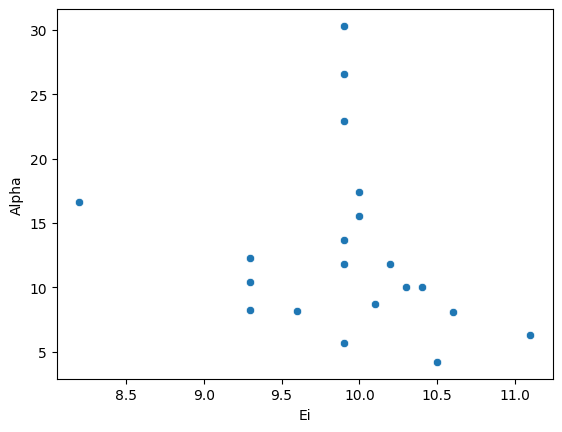

In [20]:
sns.scatterplot(df_apol, x = "Ei", y="Alpha")

In [27]:
corr_matrix = np.round(df_apol.drop(["Molecule", "Formula", "Dipole"], axis=1).corr(), 2)
corr_matrix

,Ei,Alpha,Expt,pi_bond
Ei,1.00,-0.25,-0.51,-0.76
Alpha,-0.25,1.00,0.89,-0.12
Expt,-0.51,0.89,1.00,0.30
pi_bond,-0.76,-0.12,0.30,1.00


<Axes: >

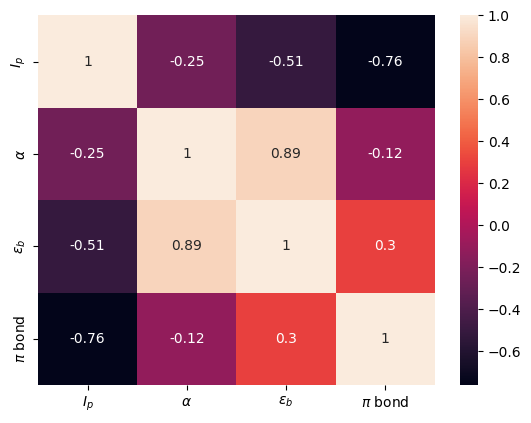

In [28]:
new_labels = [r"$I_{p}$", r"$\alpha$", r"$\epsilon_{b}$", r"$\pi$ bond"]

sns.heatmap(corr_matrix, annot=True, xticklabels= new_labels, yticklabels= new_labels)

# Curva de Aprendizagem para um modelo tunado

In [7]:
models = pickle.load(open("../models/apolar/pi_alpha/all_molecules_models.sav", "rb"))
svr = models[1]

In [8]:
df_apol

,Molecule,Formula,Ei,Alpha,Expt,pi_bond,Dipole
0,Butane,C4H10,10.6,8.10,35.0,0,0.0
1,Pentane,C5H12,10.4,10.00,60.0,0,0.0
2,Hexane,C6H14,10.2,11.80,80.0,0,0.0
3,Heptane,C7H16,9.9,13.70,105.0,0,0.0
4,Octane,C8H18,10.0,15.50,115.0,0,0.0
5,Nonane,C9H20,10.0,17.40,145.0,0,0.0
6,Dodecane,C12H26,9.9,22.90,220.0,0,0.0
7,Hexadecane,C16H34,9.9,30.30,310.0,0,0.0
8,Ethylene,C2H4,10.5,4.20,20.0,1,0.0
9,Cyclopropane,C3H6,9.9,5.70,10.0,0,0.0


In [38]:
X = df_apol[["Alpha", "pi_bond"]]
y = df_apol["Expt"]

X

,Alpha,pi_bond
0,8.10,0
1,10.00,0
2,11.80,0
3,13.70,0
4,15.50,0
5,17.40,0
6,22.90,0
7,30.30,0
8,4.20,1
9,5.70,0


In [35]:
20*0.9

18.0

In [39]:
train_scores_list = []
test_scores_list = []
train_size_list = []

train_size_abs, train_scores, test_scores = learning_curve(
    svr, X, y, train_sizes=[i for i in range(1,17)], scoring="neg_mean_absolute_percentage_error"
)
for train_size, cv_train_scores, cv_test_scores in zip(
    train_size_abs, train_scores, test_scores
):
    train_scores_list.append(-cv_train_scores.mean())
    test_scores_list.append(-cv_test_scores.mean())
    train_size_list.append(train_size)
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {-cv_train_scores.mean():.2f}")
    print(f"The average test accuracy is {-cv_test_scores.mean():.2f}")

1 samples were used to train the model
The average train accuracy is -0.00
The average test accuracy is 0.95
2 samples were used to train the model
The average train accuracy is 0.00
The average test accuracy is 1.10
3 samples were used to train the model
The average train accuracy is 0.00
The average test accuracy is 1.26
4 samples were used to train the model
The average train accuracy is 0.01
The average test accuracy is 1.31
5 samples were used to train the model
The average train accuracy is 0.01
The average test accuracy is 1.00
6 samples were used to train the model
The average train accuracy is 0.03
The average test accuracy is 1.01
7 samples were used to train the model
The average train accuracy is 0.04
The average test accuracy is 1.25
8 samples were used to train the model
The average train accuracy is 0.04
The average test accuracy is 1.39
9 samples were used to train the model
The average train accuracy is 0.08
The average test accuracy is 0.77
10 samples were used to tra

Text(0, 0.5, 'MAPE')

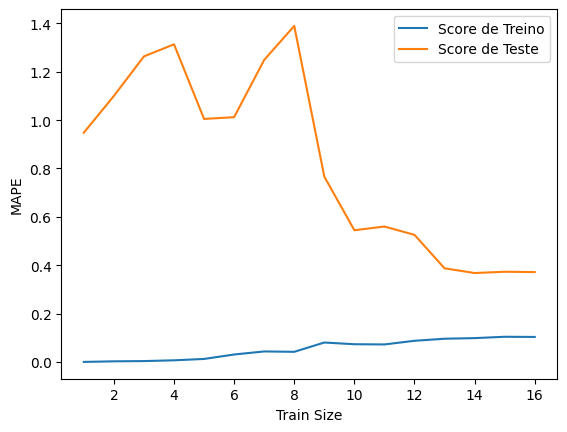

In [40]:
import matplotlib.pyplot as plt

plt.plot(train_size_list, train_scores_list, label="Score de Treino")
plt.plot(train_size_list, test_scores_list, label="Score de Teste")


plt.legend()
plt.xlabel("Train Size")
plt.ylabel("MAPE")
